In [1]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import jax.numpy as jnp

|██████████| 100.0% ◆ elapsed 365.95ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 28.20it/s]


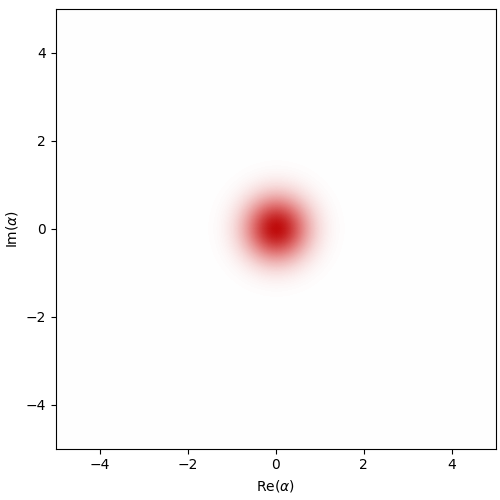

In [2]:
# 1.1 starts here
(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

kappa_b = 10
epsilon_d = -4
g2 = 1.0

H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
H = H2ph + Hd

tsave = jnp.linspace(0, 4, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0))

|██████████| 100.0% ◆ elapsed 374.70ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:02<00:00, 23.74it/s]


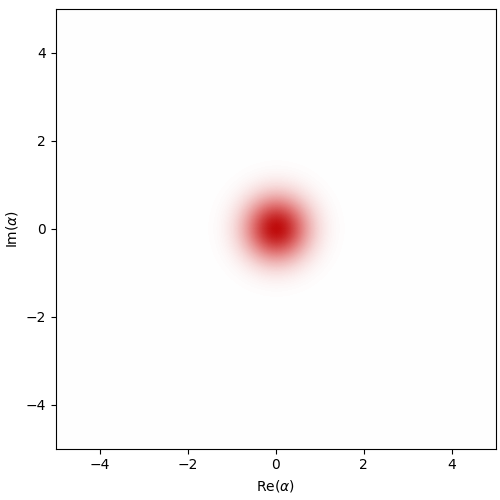

In [3]:
# 1.2 starts here
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -epsilon_d / jnp.conj(g2)
tsave = jnp.linspace(0, 4, 100)

res = dq.mesolve(H, [jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(*a.dims))], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0))

|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms     
100%|██████████| 50/50 [00:03<00:00, 15.61it/s]


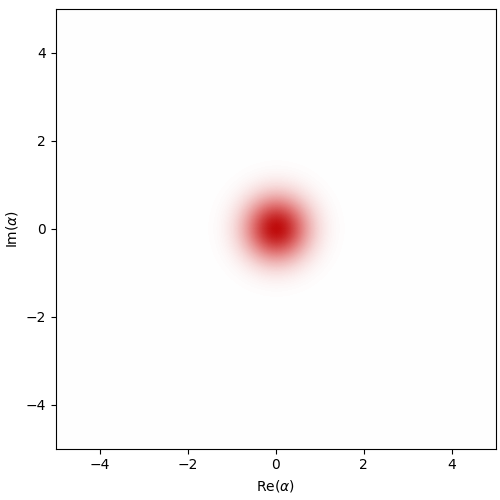

In [11]:
kappa_b = 2
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -epsilon_d / jnp.conj(g2)

res = dq.mesolve(H, [jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(*a.dims))], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0))